In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import os

# Transform 정의 (텐서로 변환 후 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# FashionMNIST 테스트 데이터셋 로드
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

# 저장할 폴더 생성
save_dir = 'test_images'
os.makedirs(save_dir, exist_ok=True)

# 첫 번째 배치의 이미지를 PNG로 저장
for idx, (image, label) in enumerate(testloader):
    # 텐서를 이미지로 변환
    img = image.squeeze()  # (1, 28, 28)에서 (28, 28)로 크기 조정
    img = img * 0.5 + 0.5  # [-1, 1]에서 [0, 1]로 정규화 해제
    img = transforms.ToPILImage()(img)  # PIL 이미지로 변환

    # 이미지 저장
    img.save(os.path.join(save_dir, f'image_{idx}.png'))

    # 예제용으로 10개까지만 저장
    if idx >= 9:
        break

print("이미지 저장 완료!")


이미지 저장 완료!


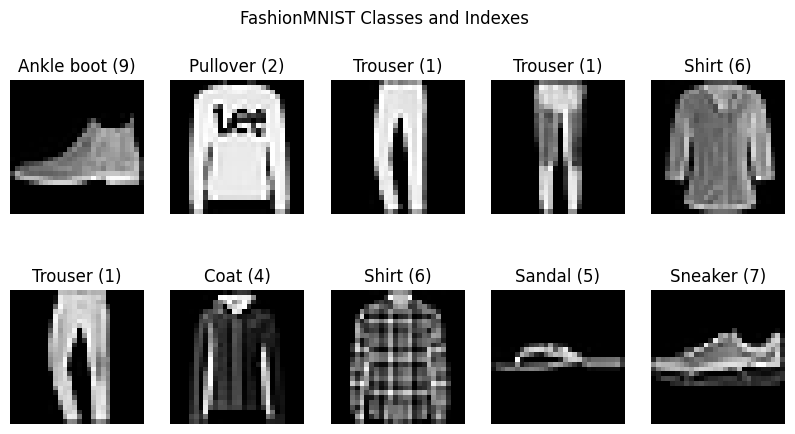

In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("FashionMNIST Classes and Indexes")
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
for i in range(10):
    image, label = testset[i]  # 이미지와 라벨 가져오기
    ax = axes[i // 5, i % 5]
    ax.imshow(image.squeeze(), cmap="gray")
    ax.set_title(f"{class_names[label]} ({label})")
    ax.axis("off")

plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms
def transform_image(image):
   
    image = image.resize((28, 28))  
    image = transforms.ToTensor()(image)  
    image = image.unsqueeze(0)  
    return image

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128) 
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10) 

    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = F.max_pool2d(x, 2) 
        
        x = F.relu(self.conv2(x))  
        x = F.max_pool2d(x, 2)  
        
        x = x.view(-1, 64 * 7 * 7)  
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
def load_model(model_path):
    model = ConvNet()  # 모델 인스턴스 생성
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))  # 모델 가중치 로드
    model.eval()  # 모델을 평가 모드로 전환
    return model


def predict(file):
    model = load_model('fashion/models/F_mnist_model.pth')
    if file:
        # 이미지를 전처리하고 모델로 예측
        img = Image.open(file)
        processed_img = transform_image(img)    
        
        # 예측
        prediction = model(processed_img)
        result_idx = torch.argmax(prediction, dim=1).item()
        result = class_names[result_idx]
    return f"{result} ( {result_idx} )"

predict("test_images/image_0.png")

C:\Users\dhg12\AppData\Local\Temp\ipykernel_27780\2083168909.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=t

'Bag ( 8 )'

이미지 크기: (28, 28)
이미지 모드: L
이미지 픽셀 값 범위: 0 - 255
훈련 데이터 크기: 60000
테스트 데이터 크기: 10000

모든 이미지의 크기: (28, 28)

테스트 데이터 클래스 개수: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

훈련 데이터 클래스별 이미지 수:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

테스트 데이터 클래스별 이미지 수:
T-shirt/top: 1000
Trouser: 1000
Pullover: 1000
Dress: 1000
Coat: 1000
Sandal: 1000
Shirt: 1000
Sneaker: 1000
Bag: 1000
Ankle boot: 1000


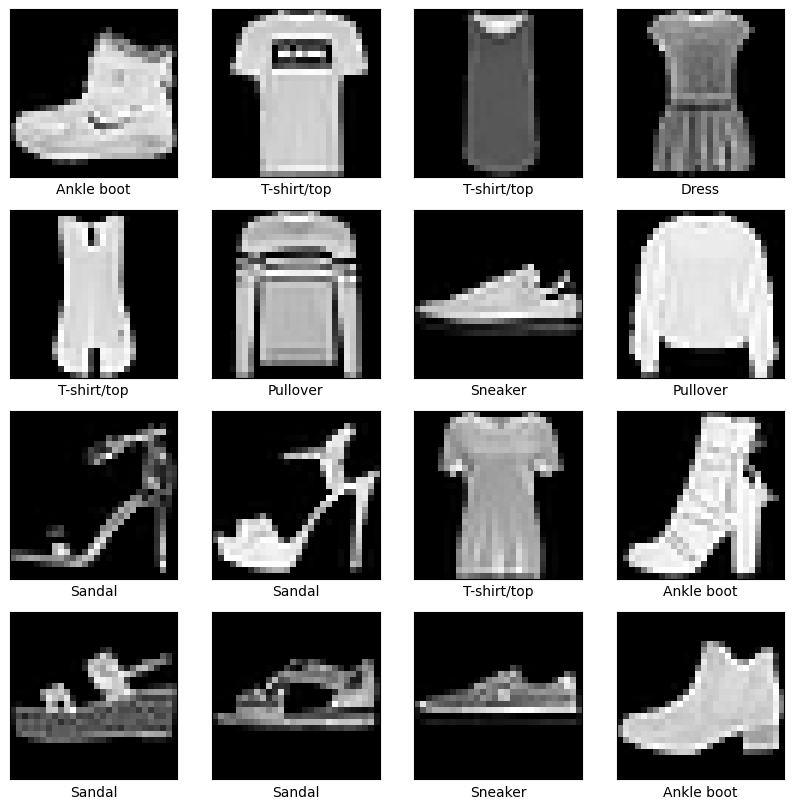

In [15]:
from torchvision import datasets
import pandas as pd
import matplotlib.pyplot as plt

# ToTensor 변환 없이 FashionMNIST 데이터셋 로드
train_data = datasets.FashionMNIST(root='data', train=True, download=True)
test_data = datasets.FashionMNIST(root='data', train=False, download=True)

# 첫 번째 이미지 확인 (PIL 이미지)
sample_image, sample_label = train_data[0]

# 이미지 크기와 모드(비트맵 형식 확인)
print("이미지 크기:", sample_image.size)
print("이미지 모드:", sample_image.mode)  # 'L'은 8비트 그레이스케일을 나타냄

# 이미지의 픽셀 값 범위 확인
pixel_values = list(sample_image.getdata())
print("이미지 픽셀 값 범위:", min(pixel_values), "-", max(pixel_values))

# 데이터셋 정보 출력
print("훈련 데이터 크기:", len(train_data))
print("테스트 데이터 크기:", len(test_data))

# 모든 이미지가 동일한 크기인지 확인
image_shapes = [sample_image.size for sample_image, _ in train_data]
unique_shapes = set(image_shapes)
print("\n모든 이미지의 크기:", unique_shapes.pop() if len(unique_shapes) == 1 else unique_shapes)

# 클래스 이름 정의
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 훈련 데이터 클래스별 이미지 수 계산
train_labels = [label for _, label in train_data]
print("\n테스트 데이터 클래스 개수:",set(train_labels))
train_class_counts = pd.Series(train_labels).value_counts().sort_index()

# 테스트 데이터 클래스별 이미지 수 계산
test_labels = [label for _, label in test_data]
test_class_counts = pd.Series(test_labels).value_counts().sort_index()

# 클래스별 이미지 수 출력
print("\n훈련 데이터 클래스별 이미지 수:")
for i, count in enumerate(train_class_counts):
    print(f"{class_names[i]}: {count}")

print("\n테스트 데이터 클래스별 이미지 수:")
for i, count in enumerate(test_class_counts):
    print(f"{class_names[i]}: {count}")

# 샘플 이미지 출력
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = train_data[i]
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[label])
plt.show()
